In [227]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [228]:
import pa ndas as pd
data = pd.read_csv (r"transfusion.csv")

In [229]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [230]:
data.columns=['Recencymonths','Frequencytimes','Monetaryccblood','Timemonths','whetherheshedonatedbloodinMarch2007']

In [231]:
data

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,whetherheshedonatedbloodinMarch2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [232]:
data

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,whetherheshedonatedbloodinMarch2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

#### 2.1. Data Type and conversion

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Recencymonths                        748 non-null    int64
 1   Frequencytimes                       748 non-null    int64
 2   Monetaryccblood                      748 non-null    int64
 3   Timemonths                           748 non-null    int64
 4   whetherheshedonatedbloodinMarch2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [234]:
data['whetherheshedonatedbloodinMarch2007'] =data["whetherheshedonatedbloodinMarch2007"].replace(" ",np.nan).astype(float) 


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Recencymonths                        748 non-null    int64  
 1   Frequencytimes                       748 non-null    int64  
 2   Monetaryccblood                      748 non-null    int64  
 3   Timemonths                           748 non-null    int64  
 4   whetherheshedonatedbloodinMarch2007  748 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 29.3 KB


In [237]:
#Tenure to categorical column
def Recency(data) :
    if data["Recencymonths"] <= 12 :
        return "Recencymonths-12"
    elif (data["Recencymonths"] > 12) & (data["Recencymonths"] <= 24 ):
        return "Recencymonths-24"
    elif (data["Recencymonths"] > 24) & (data["Recencymonths"] <= 48) :
        return "Recencymonths-48"
    elif (data["Recencymonths"] > 48) & (data["Recencymonths"] <= 60) :
        return "Recencymonths-60"
    elif data["Recencymonths"] > 60 :
        return "Recencymonths60"
    
    
data["Recency_group"] = data.apply(lambda data:Recency(data),axis = 1)

In [238]:
data.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,whetherheshedonatedbloodinMarch2007,Recency_group
0,2,50,12500,98,1.0,Recencymonths-12
1,0,13,3250,28,1.0,Recencymonths-12
2,1,16,4000,35,1.0,Recencymonths-12
3,2,20,5000,45,1.0,Recencymonths-12
4,1,24,6000,77,0.0,Recencymonths-12


# 3. Missing Value Identify & Treatment

In [239]:
print(data.isnull().sum())

Recencymonths                          0
Frequencytimes                         0
Monetaryccblood                        0
Timemonths                             0
whetherheshedonatedbloodinMarch2007    0
Recency_group                          0
dtype: int64


In [240]:
data.columns

Index(['Recencymonths', 'Frequencytimes', 'Monetaryccblood', 'Timemonths',
       'whetherheshedonatedbloodinMarch2007', 'Recency_group'],
      dtype='object')

# 4.Outlier identify & Treatment 

<AxesSubplot:ylabel='Recencymonths'>

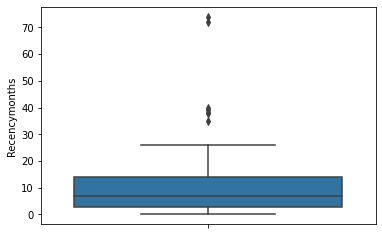

In [241]:
sns.boxplot(y=data.Recencymonths)  # Single Variable

In [242]:
q1 = data['Recencymonths'].quantile(0.25)
q3 = data['Recencymonths'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

30.875

In [243]:
data['Recencymonths']=np.where(data['Recencymonths'] > upper_limit,upper_limit,data['Recencymonths']) 


<AxesSubplot:ylabel='Recencymonths'>

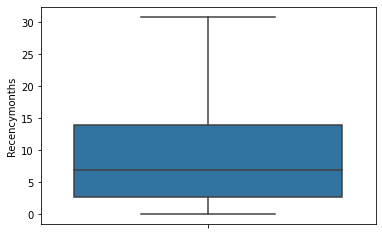

In [244]:
sns.boxplot(y='Recencymonths',data=data)  # Single Variable

<AxesSubplot:ylabel='Frequencytimes'>

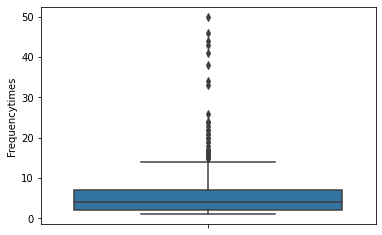

In [245]:
sns.boxplot(y=data.Frequencytimes)  # Single Variable

<AxesSubplot:ylabel='Frequencytimes'>

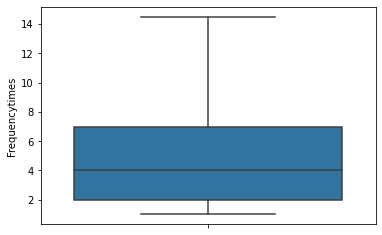

In [246]:
q1 = data['Frequencytimes'].quantile(0.25)
q3 = data['Frequencytimes'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
data['Frequencytimes']=np.where(data['Frequencytimes'] > upper_limit,upper_limit,data['Frequencytimes']) 
sns.boxplot(y='Frequencytimes',data=data)  # Single Variable

<AxesSubplot:ylabel='Monetaryccblood'>

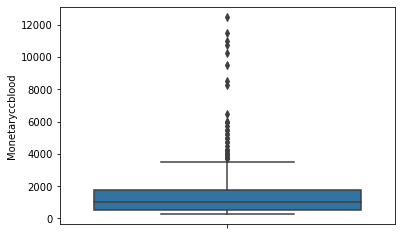

In [247]:
sns.boxplot(y='Monetaryccblood',data=data)  # Single Variable

<AxesSubplot:ylabel='Monetaryccblood'>

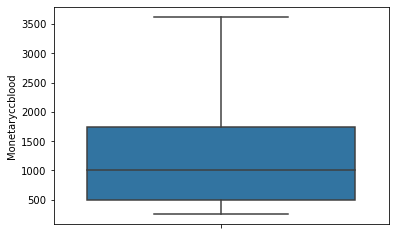

In [248]:
q1 = data['Monetaryccblood'].quantile(0.25)
q3 = data['Monetaryccblood'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
data['Monetaryccblood']=np.where(data['Monetaryccblood'] > upper_limit,upper_limit,data['Monetaryccblood']) 
sns.boxplot(y='Monetaryccblood',data=data)  # Single Variable

<AxesSubplot:ylabel='Timemonths'>

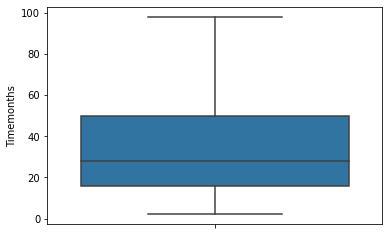

In [249]:
sns.boxplot(y='Timemonths',data=data)  # Single Variable

<AxesSubplot:ylabel='whetherheshedonatedbloodinMarch2007'>

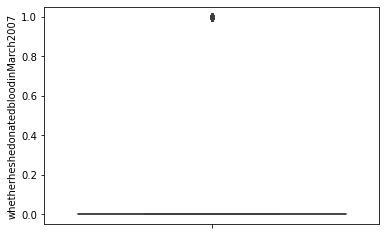

In [250]:
sns.boxplot(y='whetherheshedonatedbloodinMarch2007',data=data)  # Single Variable

# Data Visualization

In [251]:
import plotly.express as px

fig = px.pie(data,names='whetherheshedonatedbloodinMarch2007',color='whetherheshedonatedbloodinMarch2007',
             color_discrete_map={0:'red',
                                 1:'green'})
fig.show()

# 5.Labeling the data 

In [252]:
data.head()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,whetherheshedonatedbloodinMarch2007,Recency_group
0,2.0,14.5,3625.0,98,1.0,Recencymonths-12
1,0.0,13.0,3250.0,28,1.0,Recencymonths-12
2,1.0,14.5,3625.0,35,1.0,Recencymonths-12
3,2.0,14.5,3625.0,45,1.0,Recencymonths-12
4,1.0,14.5,3625.0,77,0.0,Recencymonths-12


In [253]:
data=data.drop('Recencymonths',axis=1)

In [254]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Frequencytimes',
 'Monetaryccblood',
 'Timemonths',
 'whetherheshedonatedbloodinMarch2007']

In [255]:
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,Frequencytimes,Monetaryccblood,Timemonths,whetherheshedonatedbloodinMarch2007
0,14.5,3625.0,98,1.0
1,13.0,3250.0,28,1.0
2,14.5,3625.0,35,1.0


In [256]:
data_dummies = data[data.select_dtypes(include=['object']).columns.tolist()]
data_dummies.head(3)

,Recency_group
0,Recencymonths-12
1,Recencymonths-12
2,Recencymonths-12


In [257]:
from sklearn.preprocessing import LabelEncoder
data_dummies=data_dummies.apply(LabelEncoder().fit_transform)
data_dummies.head(3)
# label in ascending order

,Recency_group
0,0
1,0
2,0


In [258]:
data= pd.concat([data_num, data_dummies],axis=1)
data.head()

,Frequencytimes,Monetaryccblood,Timemonths,whetherheshedonatedbloodinMarch2007,Recency_group
0,14.5,3625.0,98,1.0,0
1,13.0,3250.0,28,1.0,0
2,14.5,3625.0,35,1.0,0
3,14.5,3625.0,45,1.0,0
4,14.5,3625.0,77,0.0,0


# Data Partition 

In [259]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = data.drop('whetherheshedonatedbloodinMarch2007', axis = 1)
Y = data[['whetherheshedonatedbloodinMarch2007']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [260]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

# Importance Features

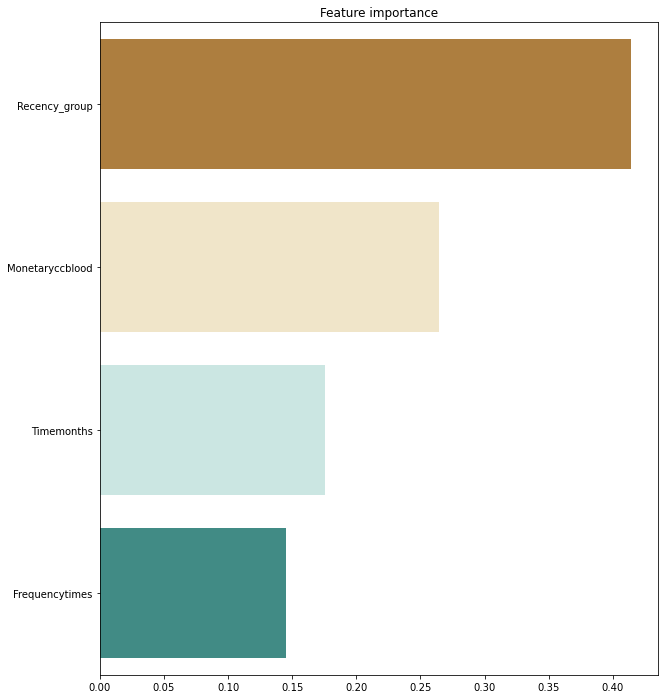

In [261]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization

In [262]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

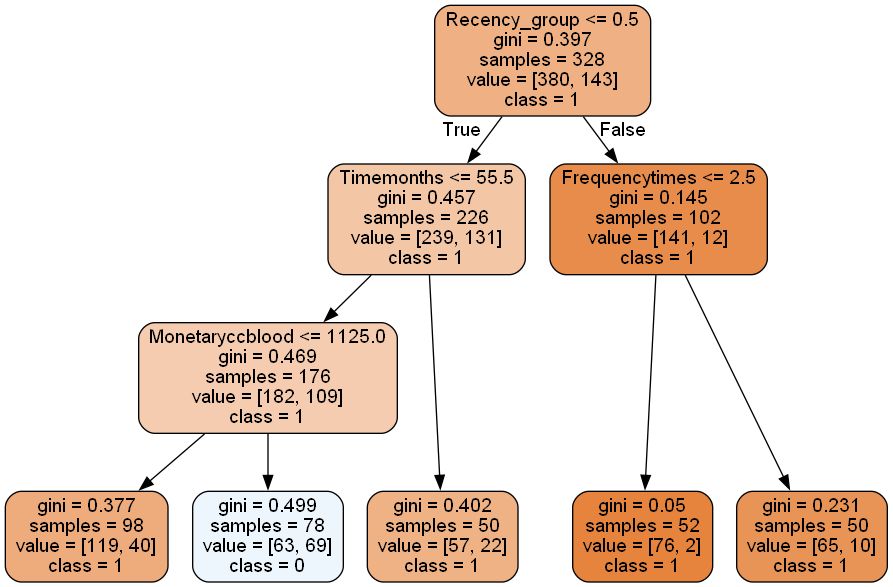

In [265]:
tree = Model.estimators_[1]  # specify the tree number   
whetherheshedonatedbloodinMarch2007=['1','0'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=whetherheshedonatedbloodinMarch2007,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [270]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Frequencytimes,Monetaryccblood,Timemonths,Recency_group,whetherheshedonatedbloodinMarch2007
308,4.0,1000.0,23,1,0.0
65,14.5,3625.0,74,0,0.0
376,5.0,1250.0,50,1,0.0
20,3.0,750.0,4,0,1.0
660,5.0,1250.0,33,1,0.0


In [271]:
train['Predicted']=Model.predict(X_train)
data.head()

,Frequencytimes,Monetaryccblood,Timemonths,Recency_group,whetherheshedonatedbloodinMarch2007,Predicted
308,4.0,1000.0,23,1,0.0,0.0
65,14.5,3625.0,74,0,0.0,0.0
376,5.0,1250.0,50,1,0.0,0.0
20,3.0,750.0,4,0,1.0,0.0
660,5.0,1250.0,33,1,0.0,0.0


# Step 7 : Model Performance Metrics


In [272]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['whetherheshedonatedbloodinMarch2007'], train['Predicted'])
print(confusion_matrix)

[[389   0]
 [134   0]]


In [273]:
Accuracy_Train=((389+0)/(523)*100)
print(Accuracy_Train)

74.37858508604207


In [274]:
from sklearn.metrics import classification_report
print(classification_report(train['whetherheshedonatedbloodinMarch2007'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       389
         1.0       0.00      0.00      0.00       134

    accuracy                           0.74       523
   macro avg       0.37      0.50      0.43       523
weighted avg       0.55      0.74      0.63       523



# Step 8 : Predictions on Test Dataset


In [275]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Frequencytimes,Monetaryccblood,Timemonths,Recency_group,whetherheshedonatedbloodinMarch2007
538,8.0,2000.0,38,0,1.0
200,6.0,1500.0,52,0,0.0
672,14.5,3625.0,87,1,0.0
536,7.0,1750.0,32,0,1.0
700,3.0,750.0,35,1,0.0


In [276]:
test['Predicted']=Model.predict(X_test)
test.head()

,Frequencytimes,Monetaryccblood,Timemonths,Recency_group,whetherheshedonatedbloodinMarch2007,Predicted
538,8.0,2000.0,38,0,1.0,0.0
200,6.0,1500.0,52,0,0.0,0.0
672,14.5,3625.0,87,1,0.0,0.0
536,7.0,1750.0,32,0,1.0,0.0
700,3.0,750.0,35,1,0.0,0.0


# Step 9 : Model Performance Metrics on Test data 

In [277]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['whetherheshedonatedbloodinMarch2007'])
print(confusion_matrix)

[[181  44]
 [  0   0]]


In [278]:
Accuracy_test=((181+0)/(225)*100)
Accuracy_test

80.44444444444444

In [279]:
from sklearn.metrics import classification_report
print(classification_report(test['whetherheshedonatedbloodinMarch2007'], test['Predicted']))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       181
         1.0       0.00      0.00      0.00        44

    accuracy                           0.80       225
   macro avg       0.40      0.50      0.45       225
weighted avg       0.65      0.80      0.72       225



# Finish

Customerid,Prediction

### Random Forest Result
* The Accuracy Of The Train Data Is 74%
* The Accuracy Of The Test Data Is 80%
* We Can Say That Our Performance Of Model Is Good And Accuracy of The Model Is Also Good. So Our Model Is Good Fit.